In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import re
import keras

In [4]:
data = []
for folder in os.listdir('output'):
    if folder not in ('.DS_Store', 'unknown', 'dot', 'colon', 'semicolon'):
        for f in os.listdir(f'output/{folder}'):
            if f.endswith('.jpg'):
                image = Image.open(f'output/{folder}/{f}')
                data.append([f[0], np.array(image)])

    elif folder in ('dot', 'colon', 'semicolon'):
        for f in os.listdir(f'output/{folder}'):
            if f.endswith('.jpg'):
                image = Image.open(f'output/{folder}/{f}')
                r = re.compile("([a-zA-Z]+)([0-9]+)")
                m = r.match(f)
                data.append([m.group(1), np.array(image)])
           

In [5]:
X = [x[1] for x in data]
y = [x[0] for x in data]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
y_train, y_test = np.array(y_train), np.array(y_test)
print(len(X_train), len(X_test), len(y_train), len(y_test))
print(X_train[0].shape)

713 179 713 179
(30, 30)


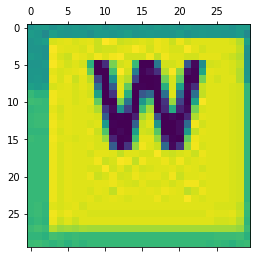

In [6]:
plt.matshow(X_train[11])

In [7]:
X_train[0].shape


(30, 30)

In [8]:
X_train, X_test = np.array(X_train), np.array(X_test)
X_train.shape

(713, 30, 30)

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train_flat, X_test_flat = X_train.reshape(len(X_train), 30*30), X_test.reshape(len(X_test), 30*30)
print(X_train_flat.shape, X_test_flat.shape)

(713, 900) (179, 900)


In [12]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z', 26:'colon', 27:'dot', 28:'semi'}
res = dict((v,k) for k,v in word_dict.items())
y_train_num, y_test_num = np.array([res[x] for x in y_train]), np.array([res[x] for x in y_test])

In [10]:
model = Sequential([
    Dense(29, input_shape=(900,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flat, y_train_num, epochs=250)

Epoch 1/250


2021-09-28 16:35:16.116505: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-28 16:35:16.179987: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


23/23 [==============================] - 0s 1ms/step - loss: 3.2533 - accuracy: 0.0575
Epoch 2/250
23/23 [==============================] - 0s 1ms/step - loss: 3.0477 - accuracy: 0.2356
Epoch 3/250
23/23 [==============================] - 0s 1ms/step - loss: 2.8764 - accuracy: 0.2553
Epoch 4/250
23/23 [==============================] - 0s 974us/step - loss: 2.7478 - accuracy: 0.3324
Epoch 5/250
23/23 [==============================] - 0s 957us/step - loss: 2.6252 - accuracy: 0.3717
Epoch 6/250
23/23 [==============================] - 0s 942us/step - loss: 2.4852 - accuracy: 0.4123
Epoch 7/250
23/23 [==============================] - 0s 972us/step - loss: 2.3700 - accuracy: 0.4418
Epoch 8/250
23/23 [==============================] - 0s 775us/step - loss: 2.2613 - accuracy: 0.4460
Epoch 9/250
23/23 [==============================] - 0s 898us/step - loss: 2.1726 - accuracy: 0.4727
Epoch 10/250
23/23 [==============================] - 0s 795us/step - loss: 2.0794 - accuracy: 0.5624
Epoch 1

In [11]:
model.evaluate(X_test_flat, y_test_num)

6/6 [==============================] - 0s 1ms/step - loss: 0.6193 - accuracy: 0.9050


[0.6193196773529053, 0.9050279259681702]

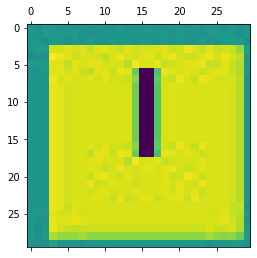

In [12]:
plt.matshow(X_test[0])

In [13]:
pred = model.predict(X_test_flat)
y_predicted_labels = [np.argmax(i) for i in pred]


In [14]:
cm = tf.math.confusion_matrix(labels=y_test_num, predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

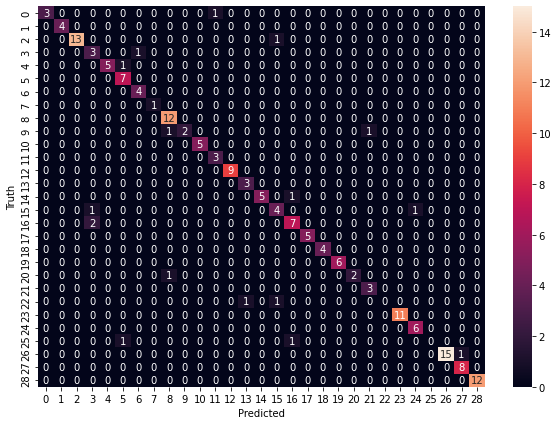

In [15]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [16]:
model = Sequential([
    Dense(250, input_shape=(900,), activation='relu'),
    Dense(500, input_shape=(900,), activation='relu'),
    Dense(29, activation='sigmoid')
])

model.compile(optimizer='Nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_flat, y_train_num, epochs=100)


Epoch 1/100
23/23 [==============================] - 1s 3ms/step - loss: 3.2497 - accuracy: 0.1052
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 2.9166 - accuracy: 0.1978
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 2.4885 - accuracy: 0.3058
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 2.1201 - accuracy: 0.3773
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 1.8043 - accuracy: 0.4839
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 1.5891 - accuracy: 0.5203
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 1.3576 - accuracy: 0.6045
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 1.2207 - accuracy: 0.6606
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 1.1204 - accuracy: 0.6522
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 0.9665 - accuracy: 0.7167
Epoch 11/

In [17]:
model.evaluate(X_test_flat, y_test_num)

6/6 [==============================] - 0s 1ms/step - loss: 0.6388 - accuracy: 0.9274


[0.6387697458267212, 0.9273743033409119]

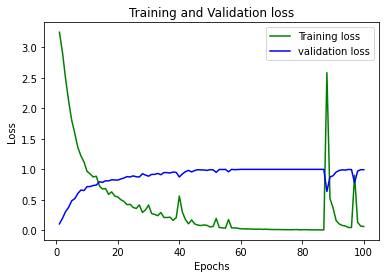

In [18]:
history.history.keys()
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1,len(loss)+1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, acc, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Text(69.0, 0.5, 'Truth')

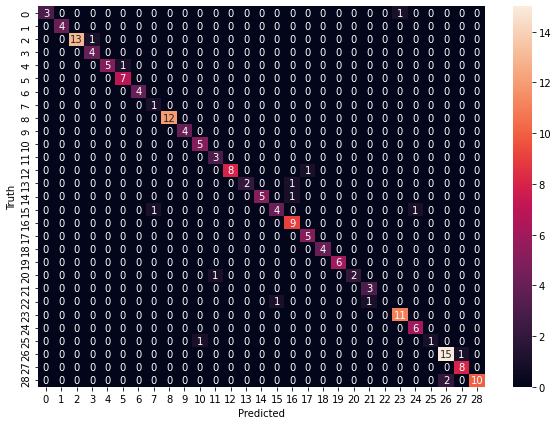

In [19]:
pred = model.predict(X_test_flat)
y_predicted_labels = [np.argmax(i) for i in pred]
cm = tf.math.confusion_matrix(labels=y_test_num, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
model.summary()
model.save(r'model_Nadam.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 250)               225250    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               125500    
_________________________________________________________________
dense_3 (Dense)              (None, 29)                14529     
Total params: 365,279
Trainable params: 365,279
Non-trainable params: 0
_________________________________________________________________


In [13]:
model = keras.models.load_model('model_Nadam.h5')
model.evaluate(X_test_flat, y_test_num)

2021-09-28 18:06:06.441370: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


6/6 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.9274


[0.6387697458267212, 0.9273743033409119]